Importando bibliotecas

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
import keras 

print(tf.__version__)
print(keras.__version__)


2.3.0
2.4.3


In [ ]:
!wget --no-check-certificate \
    "https://www.dropbox.com/s/bspqvg99cvxhj7m/dataset.zip?dl=0" \
    -O "/tmp/cats-and-dogs.zip"




--2020-09-27 19:40:41--  https://www.dropbox.com/s/bspqvg99cvxhj7m/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bspqvg99cvxhj7m/dataset.zip [following]
--2020-09-27 19:40:41--  https://www.dropbox.com/s/raw/bspqvg99cvxhj7m/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca529a59167b7901a8f427246a6.dl.dropboxusercontent.com/cd/0/inline/BAMYCvVSP5pZ44JXh-uc22BYjsBByGxw438rfaBDl9-bGfgvHrWakYFUG7NZwa5hnLA7E-a_peyzi1yW9BlGWQmMgCCzH8ss0BAV3xGNyMDZcWHSYBEpDJZY_0BDbo40Nf8/file# [following]
--2020-09-27 19:40:41--  https://uca529a59167b7901a8f427246a6.dl.dropboxusercontent.com/cd/0/inline/BAMYCvVSP5pZ44JXh-uc22BYjsBByGxw438rfaBDl9-bGfgvHrWakYFUG7NZwa5hnLA7E-a_peyzi1yW9BlGWQmMgCCzH8ss0BAV3xGNyMDZcWHS

In [ ]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Dados de teste: 500
Dados de treinamento: 2000


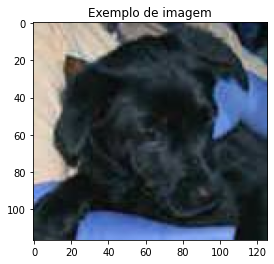

In [ ]:
print('Dados de teste:',len(os.listdir('/tmp/dataset/test_set/cachorro/')))
print('Dados de treinamento:',len(os.listdir('/tmp/dataset/training_set/cachorro/')))

import matplotlib.pyplot as plt
import cv2 as cv


img = cv.imread("/tmp/dataset/test_set/cachorro/dog.3504.jpg")

plt.imshow(img)
plt.title("Exemplo de imagem")
plt.show()

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator 


In [ ]:
classificador = Sequential()
#Primeira Camada(hidden layer)
classificador.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size= (2,2)))

#Segunda Camada(hidden layer)
classificador.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size= (2,2)))

classificador.add(Flatten())
#Camada
classificador.add(Dense(units=128 , activation='relu'))
classificador.add(Dropout(0.2))
#Camada
classificador.add(Dense(units=128 , activation='relu'))
classificador.add(Dropout(0.2))

#camada de saida
classificador.add(Dense(units=1,activation='sigmoid'))

classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip= True,
                                         shear_range=0.2,
                                         height_shift_range=0.07,
                                         zoom_range=0.2)
gerador_teste = ImageDataGenerator(rescale=1./255)



In [ ]:
base_treinamento = gerador_treinamento.flow_from_directory('/tmp/dataset/training_set',
                                                           target_size=(64,64),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 4000 images belonging to 2 classes.


In [ ]:
base_teste = gerador_teste.flow_from_directory('/tmp/dataset/test_set',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
classificador.fit_generator(base_treinamento, steps_per_epoch = 4000 / 32,
                            epochs = 5, validation_data = base_teste,
                            validation_steps = 1000 / 32)

Epoch 1/5
125/125 [==============================] - 17s 136ms/step - loss: 0.4173 - accuracy: 0.8065 - val_loss: 0.7587 - val_accuracy: 0.6630
Epoch 2/5
125/125 [==============================] - 17s 135ms/step - loss: 0.4128 - accuracy: 0.8083 - val_loss: 0.6571 - val_accuracy: 0.6760
Epoch 3/5
125/125 [==============================] - 17s 134ms/step - loss: 0.4090 - accuracy: 0.8190 - val_loss: 0.5842 - val_accuracy: 0.7320
Epoch 4/5
125/125 [==============================] - 17s 133ms/step - loss: 0.3894 - accuracy: 0.8240 - val_loss: 0.5949 - val_accuracy: 0.7290
Epoch 5/5
125/125 [==============================] - 17s 133ms/step - loss: 0.3851 - accuracy: 0.8290 - val_loss: 0.5572 - val_accuracy: 0.7350


In [ ]:
import numpy as np
from keras.preprocessing import image

imagem_para_teste_cachorro = '/tmp/dataset/test_set/cachorro/dog.3538.jpg'
imagem_para_teste_gato = '/tmp/dataset/test_set/gato/cat.3549.jpg'

test = imagem_para_teste_cachorro

image_teste = image.load_img(test, target_size=(64,64))
image_teste = image.img_to_array(image_teste)
image_teste/= 255
image_teste = np.expand_dims(image_teste,axis=0)


previsao = classificador.predict(image_teste)
previsao = (previsao > 0.5)
print(previsao)


base_teste.class_indices

[[False]]


{'cachorro': 0, 'gato': 1}

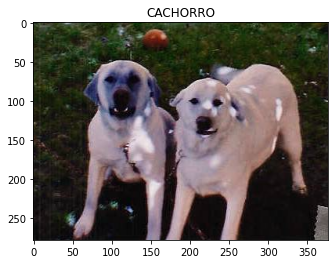

In [ ]:
if(previsao):

  imgprint = cv.imread(test)
  plt.title("GATO")
  plt.imshow(imgprint)
  plt.show()
else:
  
  imgprint = cv.imread(test)
  plt.title("CACHORRO")
  plt.imshow(imgprint)
  plt.show()